In [1]:
import pandas as pd
import numpy as np
from functions import energyoftrans,emist
make='model4'
GasPhase={'H' : 0.0000,  'He': -1.0000,  
          'C' : -4.6108, 'N' : -5.0701,  
          'O' :-4.3098, 'Na': -6.6696,  
          'Mg': -5.4597, 'Si':-5.4597} #log(number densities of elements),relative to hydrogen abundance of unity
#constants
kboltz= 1.38065e-16 #(*cgs*)
light = 2.99792e+18   #(* A s^-1 *)
eVtoErg = 1.60218e-12
hplanckerg = 6.626068e-27  #(* erg s *)
hplanckeV = 4.135667e-15  #(* eV s *) 
def n_ion(ele,Hden,frac):
    # ele : element serves as key for the GasPhase dict, string, solar abundance
    # Hden : hydrogen number density
    # frac : average probability abundance of ion across zones (OVI Frac)
    Nele_Sol=10**(GasPhase[ele])
    n_ion=frac*Hden*Nele_Sol
    return n_ion
def Emist(ne, Tgas_exponent, Ycal, Eion, gground, n_ion):
    import numpy as np
    # ne : number density of electrons
    # Tgas_exponent : power of temperature of gas in Kelvin
    # Ycal : effective collision strength
    # Eion : Energy of the photon coming from the transition (erg)
    # gground : ground degeneracy, can be found with Chianti or Stout
    # n_ion : Number density of the ion 
    Tgas=10**Tgas_exponent
    kboltz= 1.38065e-16 #(*cgs*)
    numberemis=n_ion*ne*((8.629e-6)/np.sqrt(Tgas))*(Ycal/gground)*np.exp(-Eion/(kboltz*Tgas))
    #returns emisstivity of line
    return numberemis * Eion

In [98]:
#returns ovr table with Temperature, Htot, hydrogen density, e density, and OVI density

vari='.ovr'
table=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
ovr=table.loc[:,['#depth','Te','Htot','hden','eden','O3']]
Temp=np.log10(ovr.loc[0,"Te"])
#ovr

In [101]:
#returns emis table with Emissivity of H 1 4861.33A, H 1 6562.81A, O 6 1031.00A, O 6 1037.62A

vari='.emis'
emis=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
#emis.columns=['#depth','H1-4861.33A', 'H1-6562.81A', 'O6-1031.91A','O6-1037.62A']
emis.columns=['#depth','H1-4861.33A', 'H1-6562.81A','O3 2320.95A', 'O3 4958.91A', 'O3 5006.84A']

#isolates the 1031 and 1037 lines as independent tables
line4958= emis.loc[:,'O3 4958.91A'] 
line5006= emis.loc[:,'O3 5006.84A']
line2320= emis.loc[:,'O3 2320.95A']


#line4958
#line5006
emis

,#depth,H1-4861.33A,H1-6562.81A,O3 2320.95A,O3 4958.91A,O3 5006.84A
0,7.905700e+17,3.068800e-31,7.875000e-31,1.500500e-31,1.708000e-30,5.095900e-30
1,3.083220e+18,3.068500e-31,7.874500e-31,1.500400e-31,1.707900e-30,5.095600e-30
2,5.937180e+18,3.068400e-31,7.874000e-31,1.500400e-31,1.707800e-30,5.095400e-30
3,8.505740e+18,3.068300e-31,7.873700e-31,1.500400e-31,1.707800e-30,5.095400e-30
4,1.081740e+19,3.068200e-31,7.873400e-31,1.500300e-31,1.707800e-30,5.095300e-30
5,1.289800e+19,3.068100e-31,7.873300e-31,1.500300e-31,1.707800e-30,5.095300e-30
6,1.477050e+19,3.068100e-31,7.873200e-31,1.500400e-31,1.707800e-30,5.095400e-30
7,1.645570e+19,3.068100e-31,7.873200e-31,1.500400e-31,1.707800e-30,5.095400e-30
8,1.797240e+19,3.068100e-31,7.873200e-31,1.500400e-31,1.707800e-30,5.095500e-30
9,1.933740e+19,3.068100e-31,7.873200e-31,1.500400e-31,1.707900e-30,5.095500e-30


In [100]:
#returns eleH table with H	H+	H2 probabilites for each zone

vari='.ele_H'
eleH=pd.read_csv('{0}{1}'.format(make, vari),delimiter='	')
#print(eleH)
#returns eleO table with O	O+	O+2	O+3	O+4	O+5	O+6	O+7	O+8	O[1]	O[2]	O[3] probabilites for each zone
vari='.ele_O'
eleO=pd.read_csv('{0}{1}'.format(make,vari),delimiter='	')
#eleO

#returns table OVI_prob with OVI probabilites for each zone
OIII_prob = eleO.loc[:,['#depth', 'O+2']]
#OIII_prob

In [41]:
O3frac=np.average(OIII_prob.loc[:,'O+2'].values)
eden=np.average(ovr.loc[:,'eden'].values)
emis4958=np.average(line4958.values)
emis5006=np.average(line5006.values)
emis2320=np.average(line2320.values)
hden=np.average(ovr.loc[:,'hden'].values)

In [42]:
#number of OIII
Noxy_Sol=10**(GasPhase['O'])
Zsol=10**-1 #metallicity
nOIII=O3frac*Zsol*Noxy_Sol
print('nOIII is',nOIII)
length=ovr.loc[:,"#depth"].max() -  ovr.loc[:,"#depth"].min()
#N_OIII=nOIII*length
#print('Column density of OVI is',N_OIII)
O3frac
#pd.read_csv('model4.out',skiprows=51,skipfooter=976,delimiter='  ')

nOIII is 7.791070322412448e-16


1.5900000000000002e-10

In [43]:
SimnDat=[hden, 
         eden,
         O3frac,
         emis2320,
         emis4958,
         emis5006]
SimuDatKeyset=['H Density Log /cm^3',
               'e Density Log /cm^3',
               'OIII Probability',
               'OIII 2321 Emis',
               'OIII 4958 Emis', 
               'OIII 5006 Emis']
matrix={SimuDatKeyset[0]:[SimnDat[0]],
        SimuDatKeyset[1]:[SimnDat[1]],
        SimuDatKeyset[2]:[SimnDat[2]],
        SimuDatKeyset[3]:[SimnDat[3]],
        SimuDatKeyset[4]:[SimnDat[4]],
        SimuDatKeyset[5]:[SimnDat[5]]}

In [44]:
location=location+1
meta.insert(location,f"Temp:1e{Temp:1.1f} K , hden: {np.log10(hden):1.1f}",SimnDat)

In [55]:
meta #3.0 [factor=-2] on

,"Temp:1e4.0 K , hden: -2.5","Temp:1e4.5 K , hden: -2.5","Temp:1e5.0 K , hden: -2.5","Temp:1e5.5 K , hden: -2.5","Temp:1e6.0 K , hden: -2.5"
H Density Log /cm^3,3.162300e-03,3.162300e-03,3.162300e-03,3.162300e-03,3.162300e-03
e Density Log /cm^3,3.211145e-03,3.470518e-03,3.779224e-03,3.796200e-03,3.796791e-03
OIII Probability,4.389091e-02,2.790303e-01,4.590000e-01,4.190000e-04,1.590000e-10
OIII 2321 Emis,1.245439e-34,3.868945e-32,1.500309e-31,1.207400e-34,3.003288e-41
OIII 4958 Emis,2.546097e-32,8.530082e-31,1.707718e-30,1.165600e-33,2.801112e-40
OIII 5006 Emis,7.596476e-32,2.545012e-30,5.095142e-30,3.477700e-33,8.357403e-40


## Run once per line

In [8]:
meta=pd.DataFrame(data=matrix,index={f"Temp:1e{Temp:1.1f} K , hden: {np.log10(hden):1.1f}"}).transpose()
#meta.rename(index={'Temp'})

In [9]:
location=0

In [85]:
meta.to_csv('./OIII-DataTables/OIIITemp(3-7)hden(const).csv',index=False)

In [3]:
SimuDatKeyset=['H Density Log /cm^3',
               'e Density Log /cm^3',
               'OIII Probability',
               'OIII 2321 Emis',
               'OIII 4958 Emis', 
               'OIII 5006 Emis']
meta=pd.read_csv('./OIII-DataTables/OIIITemp(3-7)hden(const).csv').set_index(np.array(SimuDatKeyset))

In [15]:
cloudy=meta.loc['OIII 4958 Emis'].values 



array([1.09466943, 1.01819475, 0.99236085, 0.95673451, 0.9324502 ])

In [4]:
OIIIfracs=meta.loc['OIII Probability'].values
edens=meta.loc['e Density Log /cm^3'].values
Temperature=np.arange(4,6.5,step=.5)
#####
OIII_2321_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_2321=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground2320 = 3    
    YcalOIII=.0229 #different for differnt lines 
    EOIII2P3P = energyoftrans(2321)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII2P3P,gOIIIground2320,nOIII)
    OIII_2321_calcEMIS[f"T{Temperature[i]}"].append(calc)
    OIII_2321.append(calc)
#####
OIII_4958_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_4958=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground4958 = 3 
    YcalOIII=2.29 #different for differnt lines 
    EOIII3P1D = energyoftrans(4958.91)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII3P1D,gOIIIground4958,nOIII)
    OIII_4958_calcEMIS[f"T{Temperature[i]}"].append(calc)  
    OIII_4958.append(calc)
#####
OIII_5006_calcEMIS={'T4.0':[],
                    'T4.5':[],
                    'T5.0':[],
                    'T5.5':[],
                    'T6.0':[]}
OIII_5006=[]
for i in range(0,len(OIIIfracs)):
    gOIIIground5006 = 5
    YcalOIII=2.29 #different for differnt lines 
    EOIII3P1D = energyoftrans(5006.84)
    hDen=3.162300e-03
    
    nOIII=n_ion('O',hDen,OIIIfracs[i])
    calc=Emist(edens[i],Temperature[i],YcalOIII,EOIII3P1D,gOIIIground5006,nOIII)
    OIII_5006_calcEMIS[f"T{Temperature[i]}"].append(calc)
    OIII_5006.append(calc)

In [115]:
OIII_2321_calcEMIS

{'T4.0': [2.5012043447139296e-34],
 'T4.5': [6.698649600221744e-32],
 'T5.0': [2.577967905434809e-31],
 'T5.5': [2.030990824473656e-34],
 'T6.0': [4.956449871560244e-41]}

In [5]:
OIII_4958_calcEMIS

{'T4.0': [3.1662439259372188e-31],
 'T4.5': [8.895040811186836e-30],
 'T5.0': [1.6779424006212962e-29],
 'T5.5': [1.0550767491342436e-32],
 'T6.0': [2.397621890803888e-39]}

In [117]:
OIII_5006_calcEMIS

{'T4.0': [1.934552608168509e-31],
 'T4.5': [5.332565245305641e-30],
 'T5.0': [9.999011161539688e-30],
 'T5.5': [6.275368927283773e-33],
 'T6.0': [1.4251976013800269e-39]}

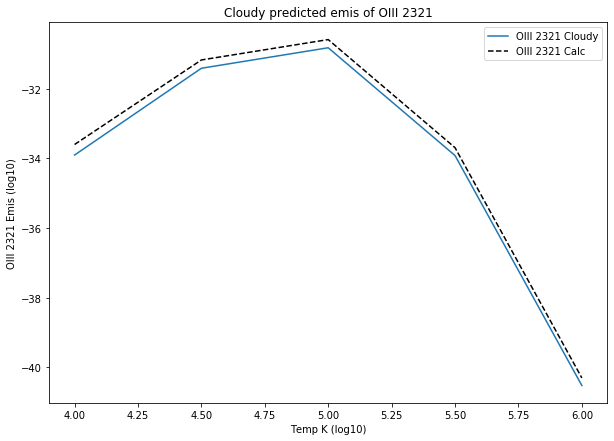

In [130]:
emis2321_vals=meta.loc['OIII 2321 Emis',:].values
emis4958_vals=meta.loc['OIII 4958 Emis',:].values
emis5006_vals=meta.loc['OIII 5006 Emis',:].values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis2321_vals),label='OIII 2321 Cloudy')
plt.plot(Temperature,np.log10(OIII_2321),'--k',label='OIII 2321 Calc')
plt.ylabel('OIII 2321 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 2321")
plt.legend()

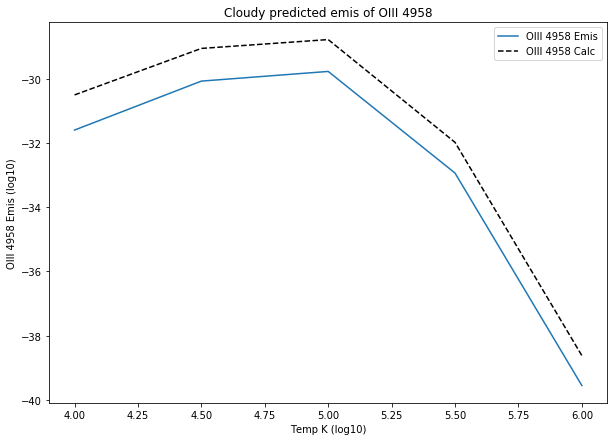

In [129]:
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis4958_vals),label='OIII 4958 Emis')
plt.plot(Temperature,np.log10(OIII_4958),'--k',label='OIII 4958 Calc')
plt.ylabel('OIII 4958 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 4958")
plt.legend()

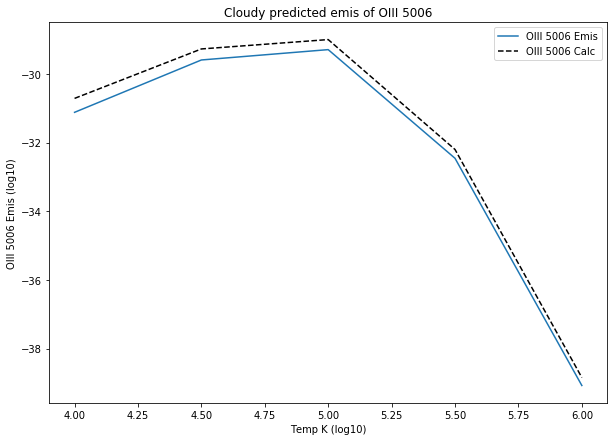

In [128]:
plt.figure(figsize=(10,7))
plt.plot(Temperature,np.log10(emis5006_vals),label='OIII 5006 Emis')
plt.plot(Temperature,np.log10(OIII_5006),'--k',label='OIII 5006 Calc')
plt.ylabel('OIII 5006 Emis (log10)')
plt.xlabel('Temp K (log10)')
plt.title("Cloudy predicted emis of OIII 5006")
plt.legend()

# .scups of OIII however these are the elctron collsion strengths and these are photo lines???
### 2320:
2      5   3.868e-01  -1.000e+00   1.000e-06   36    2   1.000e-01
   0.000e+00   1.611e-02   2.020e-02   2.530e-02   3.163e-02   3.951e-02   4.923e-02   6.120e-02   7.584e-02   9.364e-02   1.151e-01   1.407e-01   1.709e-01   2.061e-01   2.462e-01   2.914e-01   3.411e-01   3.946e-01   4.507e-01   5.082e-01   5.653e-01   6.208e-01   6.734e-01   7.219e-01   7.656e-01   8.044e-01   8.805e-01   9.365e-01   9.672e-01   9.866e-01   9.933e-01   9.966e-01   9.986e-01   9.993e-01   9.997e-01   1.000e+00
   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   9.000e-02   8.900e-02   8.900e-02   8.900e-02   8.800e-02   8.800e-02   8.700e-02   8.700e-02   8.800e-02   8.900e-02   9.100e-02   9.500e-02   9.800e-02   1.020e-01   1.060e-01   1.090e-01   1.120e-01   1.280e-01   1.260e-01   1.150e-01   8.620e-02   6.170e-02   4.050e-02   2.110e-02   1.220e-02   6.830e-03   1.000e-06
   
### 4958
2      4   2.072e-01  -1.000e+00   1.650e-05   36    2   1.558e-01
   0.000e+00   1.925e-02   2.411e-02   3.017e-02   3.767e-02   4.698e-02   5.843e-02   7.246e-02   8.955e-02   1.102e-01   1.349e-01   1.640e-01   1.981e-01   2.372e-01   2.813e-01   3.302e-01   3.829e-01   4.386e-01   4.959e-01   5.532e-01   6.092e-01   6.624e-01   7.119e-01   7.567e-01   7.965e-01   8.314e-01   8.983e-01   9.464e-01   9.725e-01   9.888e-01   9.944e-01   9.972e-01   9.989e-01   9.994e-01   9.997e-01   1.000e+00
   6.915e-01   6.970e-01   6.980e-01   7.000e-01   7.020e-01   7.060e-01   7.100e-01   7.150e-01   7.190e-01   7.200e-01   7.180e-01   7.130e-01   7.050e-01   6.960e-01   6.860e-01   6.770e-01   6.720e-01   6.730e-01   6.820e-01   7.000e-01   7.240e-01   7.510e-01   7.780e-01   8.030e-01   8.250e-01   8.420e-01   9.240e-01   8.940e-01   8.150e-01   6.250e-01   4.610e-01   3.160e-01   1.760e-01   1.080e-01   6.420e-02   1.650e-05

### 5006
 3      4   2.052e-01  -1.000e+00   1.250e-04   36    2   1.573e-01
   0.000e+00   1.925e-02   2.411e-02   3.017e-02   3.767e-02   4.698e-02   5.843e-02   7.246e-02   8.955e-02   1.102e-01   1.349e-01   1.640e-01   1.981e-01   2.372e-01   2.813e-01   3.302e-01   3.829e-01   4.386e-01   4.959e-01   5.532e-01   6.092e-01   6.624e-01   7.119e-01   7.567e-01   7.965e-01   8.314e-01   8.983e-01   9.464e-01   9.725e-01   9.888e-01   9.944e-01   9.972e-01   9.989e-01   9.994e-01   9.997e-01   1.000e+00
   1.163e+00   1.170e+00   1.172e+00   1.174e+00   1.178e+00   1.184e+00   1.191e+00   1.199e+00   1.206e+00   1.208e+00   1.205e+00   1.197e+00   1.184e+00   1.168e+00   1.152e+00   1.137e+00   1.129e+00   1.131e+00   1.148e+00   1.177e+00   1.217e+00   1.262e+00   1.307e+00   1.348e+00   1.385e+00   1.414e+00   1.550e+00   1.500e+00   1.360e+00   1.050e+00   7.730e-01   5.300e-01   2.960e-01   1.810e-01   1.080e-01   1.250e-04


In [ ]:
scal_temps=[0.000e+00 ,  1.429e-01  , 2.857e-01 ,  4.286e-01 ,  5.714e-01  , 7.143e-01  , 8.571e-01  , 1.000e+00]
def unscal_temp(temp):
    Tmax=7.20e7
    Tmin=7.20e+03
    #B=(1/4)*np.log(7.20e3)
    T=10**((np.log10(Tmax/Tmin))*temp + np.log10(Tmin))
    #T=np.exp(4*(temp+B))
    return T
for i in scal_temps:
    print(unscal_temp(i))
    print(np.log10(unscal_temp(i)))
    print("---")

In [ ]:
import pyatomdb, numpy, pylab

# We will get some maxwellian rates for a O 6+ 7->1

Z = 8
z1 = 7
up = 7
lo = 1

# excitation

Te = numpy.logspace(4, 7, 15)

#  >>> # (1) Get excitation rates for row 12 of an Fe XVII file
#  >>> colldata = pyatomdb.atomdb.get_data(26,17,'EC')
#  >>> exc, dex = get_maxwell_rate(Te, colldata=colldata, index=12)

#  >>> # (2) Get excitation rates for row 12 of an Fe XVII file
#  >>> exc, dex = get_maxwell_rate(Te, Z=26,z1=17, index=12)

#  >>>  (3) Get excitation rates for transitions from level 1 to 15 of FE XVII
#  >>> exc, dex = get_maxwell_rate(Te, Z=26, z1=17, dtype='EC', finallev=15, initlev=1)

datacache = {}

# get data by specifying ion, upper and lower levels
exc, dexc = pyatomdb.atomdb.get_maxwell_rate(Te, Z=Z, z1=z1, initlev = lo, finallev=up, dtype='EC', datacache=datacache)

fig= pylab.figure()
fig.show()
ax = fig.add_subplot(111)
ax.loglog(Te, exc, label='excitation')
ax.loglog(Te, dexc, label = 'deexcitation')


# preload data and find a specific transition
ecdat = pyatomdb.atomdb.get_data(8,7,'EC', datacache=datacache)

i = numpy.where( (ecdat[1].data['Upper_Lev']==up) &\
                 (ecdat[1].data['Lower_Lev']==lo))[0][0]

exc, dex = pyatomdb.atomdb.get_maxwell_rate(Te,colldata=ecdat, index=i, datacache=datacache)

ax.loglog(Te, exc, 'o', label='excitation')
ax.loglog(Te, dexc, 'o', label = 'deexcitation')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_1.pdf')
fig.savefig('atomdb_examples_2_1.svg')

# you can also obtain ionization or recombination rates (see get_maxwell_rates writeup for options)
# in most cases you need to specify initlev and finallev as 1 to get the ion to ion rates.

ion= pyatomdb.atomdb.get_maxwell_rate(Te,Z=Z, z1=z1, initlev=1, finallev=1, dtype='CI', datacache=datacache)
print(ion)
#
# However it is recommended that you use get_ionrec_rate instead - it gives you everythign in one go

# combining the different types
ion, rec = pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache)

# as separate entities
CI, EA, RR, DR=pyatomdb.atomdb.get_ionrec_rate(Te, Z=Z, z1=z1, datacache=datacache, separate=True)

print("Collisional ionization: ",CI)
print("Excitation Autoionization: ",EA)
print("Radiative Recombination: ",RR)
print("Dielectroni Recombination: ",DR)
ax.cla()

ax.loglog(Te, ion, label='Ionization')
ax.loglog(Te, rec, label='Recombination')

ax.loglog(Te, CI, '--',label='CI')
ax.loglog(Te, EA, '--',label='EA')
ax.loglog(Te, RR, '--',label='RR')
ax.loglog(Te, DR, '--',label='DR')

ax.legend(loc=0)
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Rate Coefficient (cm$^3$ s$^{-1}$)")

pylab.draw()
zzz=input("Press enter to continue")
# save image files
fig.savefig('atomdb_examples_2_2.pdf')
fig.savefig('atomdb_examples_2_2.svg')


#get_maxwell_rate(Te, colldata=False, index=-1, lvdata=False, Te_unit='K', \
#                     lvdatap1=False, ionpot = False, \
#                     force_extrap=False, silent=True,\
#                     finallev=False, initlev=False,\
#                     Z=-1, z1=-1, dtype=False, exconly=False,\
#                     datacache=False, settings=False, ladat=False):
